# Plot 2 month Hovmoller for Radar and BARRA2 data

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import geopandas
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from netCDF4 import Dataset
import os
import glob
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import SubplotDivider, Size
from datetime import datetime
from dateutil import tz
from dateutil.tz import gettz
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Radar Reflectivity Data

In [3]:
# read in townsville radar reflectivity data for 2 month period
mypathT = "/g/data/rq0/level_2/73/REFLECTIVITY/"
files_T1 = [os.path.join(root, f) for root, _, files in os.walk(mypathT)
         for f in files
         if f.startswith('73_202201') and f.endswith('.nc')]
files_T2  = [os.path.join(root, f) for root, _, files in os.walk(mypathT)
         for f in files
         if f.startswith('73_202202') and f.endswith('.nc')]
files_T = files_T1+files_T2
# read cairns radar reflectivity data for 2 month period
mypathC = "/g/data/rq0/level_2/19/REFLECTIVITY/"
files_C1 = [os.path.join(root, f) for root, _, files in os.walk(mypathC)
         for f in files
         if f.startswith('19_202201') and f.endswith('.nc')]
files_C2  = [os.path.join(root, f) for root, _, files in os.walk(mypathC)
         for f in files
         if f.startswith('19_202202') and f.endswith('.nc')]
files_C = files_C1+files_C2
# read willis island reflectivity data for jan-feb 2022
mypathW = "/g/data/rq0/level_2/41/REFLECTIVITY/"
files_W1 = [os.path.join(root, f) for root, _, files in os.walk(mypathW)
         for f in files
         if f.startswith('41_202201') and f.endswith('.nc')]
files_W2  = [os.path.join(root, f) for root, _, files in os.walk(mypathW)
         for f in files
         if f.startswith('41_202202') and f.endswith('.nc')]
files_W = files_W1+files_W2

ds_T = xr.open_mfdataset(files_T, engine="netcdf4")
ds_C = xr.open_mfdataset(files_C, engine="netcdf4")
ds_W = xr.open_mfdataset(files_W, engine="netcdf4")

## Radar Rain Rate Data

In [3]:
# read in townsville radar rain rate data for 2 month period
mypathT = "/g/data/rq0/level_2/73/RAINRATE/"
files_T1 = [os.path.join(root, f) for root, _, files in os.walk(mypathT)
         for f in files
         if f.startswith('73_202201') and f.endswith('.nc')]
files_T2  = [os.path.join(root, f) for root, _, files in os.walk(mypathT)
         for f in files
         if f.startswith('73_202202') and f.endswith('.nc')]
files_T = files_T1+files_T2
# read cairns radar rain rate data for 2 month period
mypathC = "/g/data/rq0/level_2/19/RAINRATE/"
files_C1 = [os.path.join(root, f) for root, _, files in os.walk(mypathC)
         for f in files
         if f.startswith('19_202201') and f.endswith('.nc')]
files_C2  = [os.path.join(root, f) for root, _, files in os.walk(mypathC)
         for f in files
         if f.startswith('19_202202') and f.endswith('.nc')]
files_C = files_C1+files_C2
# read willis island reflectivity data for jan-feb 2022
mypathW = "/g/data/rq0/level_2/41/RAINRATE/"
files_W1 = [os.path.join(root, f) for root, _, files in os.walk(mypathW)
         for f in files
         if f.startswith('41_202201') and f.endswith('.nc')]
files_W2  = [os.path.join(root, f) for root, _, files in os.walk(mypathW)
         for f in files
         if f.startswith('41_202202') and f.endswith('.nc')]
files_W = files_W1+files_W2

ds_T = xr.open_mfdataset(files_T, engine="netcdf4")
ds_C = xr.open_mfdataset(files_C, engine="netcdf4")
ds_W = xr.open_mfdataset(files_W, engine="netcdf4")

In [31]:
radar_rr_T = ds_T.rainrate.isel(y=150,x=slice(0,150)) # x slice should be modified to be a little longer to cover all land area 
time_T = ds_T.time.groupby("time.hour")
time_array_T = []
rr_data = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
    time_TT = time_T[i].values
    time_array_T.append(time_TT)
#radar_rr_T = radar_rr_T[np.isnan(radar_rr_T)]
for j in time_array_T:
    r = radar_rr_T.values
    rr = np.where(r>0)
    rr_data.append(rr)

In [40]:
rr_data[0]

(array([    0,     0,     1, ..., 16931, 16939, 16940]),
 array([145, 146, 142, ..., 146, 144, 145]))

In [25]:
ds_T

<xarray.Dataset>
Dimensions:    (time: 16992, y: 301, x: 301)
Coordinates:
  * x          (x) int32 -150000 -149000 -148000 ... 148000 149000 150000
  * y          (y) int32 -150000 -149000 -148000 ... 148000 149000 150000
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-02-28T23:55:00
Data variables:
    rainrate   (time, y, x) float32 dask.array<chunksize=(288, 301, 301), meta=np.ndarray>
    longitude  (time, y, x) float32 dask.array<chunksize=(288, 301, 301), meta=np.ndarray>
    latitude   (time, y, x) float32 dask.array<chunksize=(288, 301, 301), meta=np.ndarray>
    isfile     (time) int32 dask.array<chunksize=(288,), meta=np.ndarray>
Attributes: (12/57)
    summary:                       Level 2 dataset from the Australian radar ...
    history:                       created by Joshua Soderholm on gadi.nci.or...
    acknowledgement:               This work is support by the Bureau of Mete...
    institution:                   Bureau of Meteorology
    keywords:                      radar, Doppler, dual-polarization
    licence:                       CC4.0-BY-NC (if the latest dataset licence...
    ...                            ...
    geospatial_vertical_min:       0
    geospatial_vertical_max:       2500
    comments:                      Radar reflectivity has not been corrected ...
    geospatial_projection:         Azimuthal equidistant projection
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m

In [ ]:
T_rr = ds_T.rainrate.isel(y=150,x=slice(0,150)).astype('float')
group = T_rr.groupby("time.hour")
mean = []
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
    av = group[i].dropna(dim="x").values.mean()
    mean.append(av)
#plt.plot(group.mean())
sns.displot(mean)

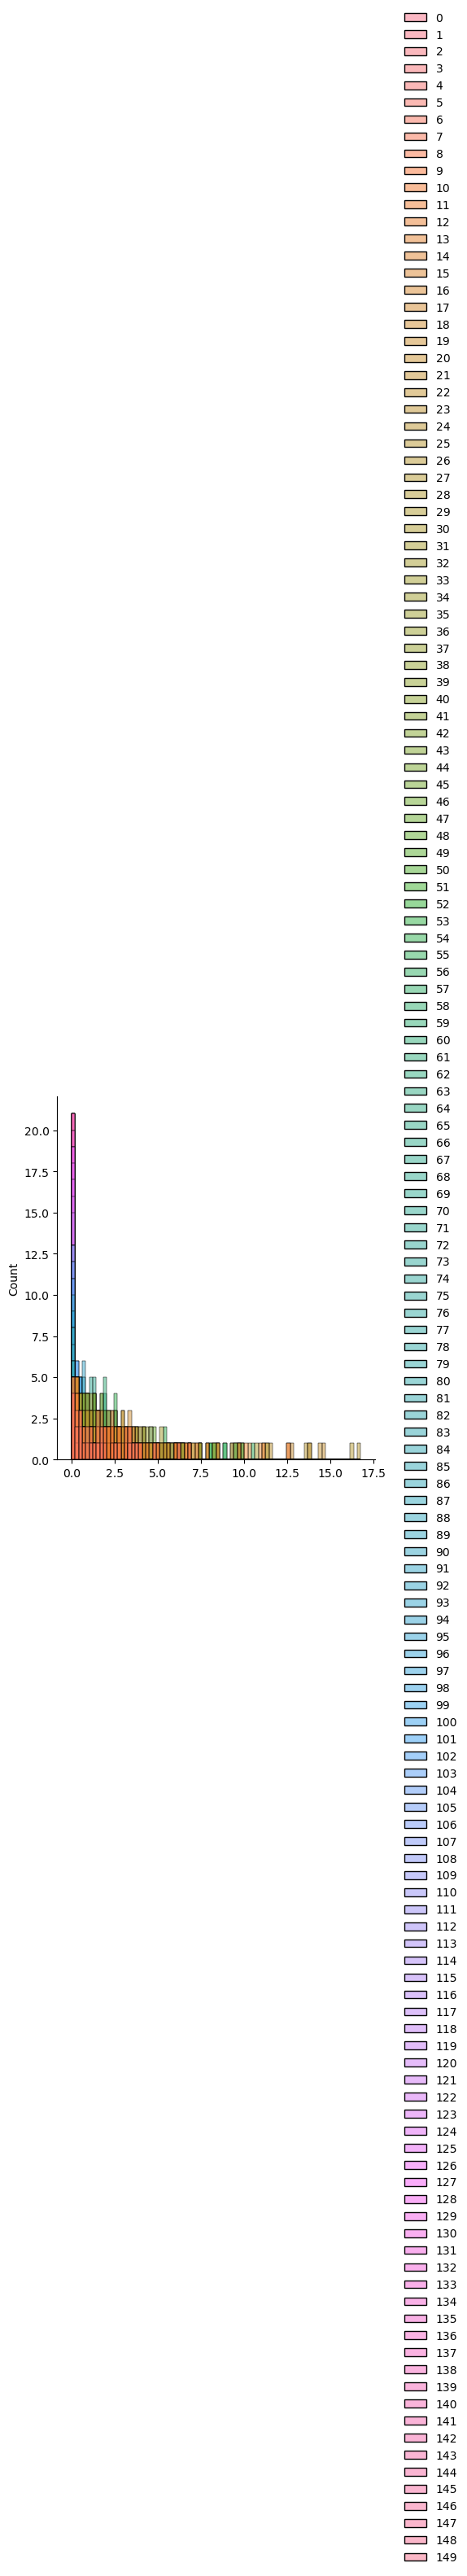

In [76]:
sns.displot(ds_T.rainrate.isel(y=150,x=slice(0,150)).groupby("time.hour").mean())

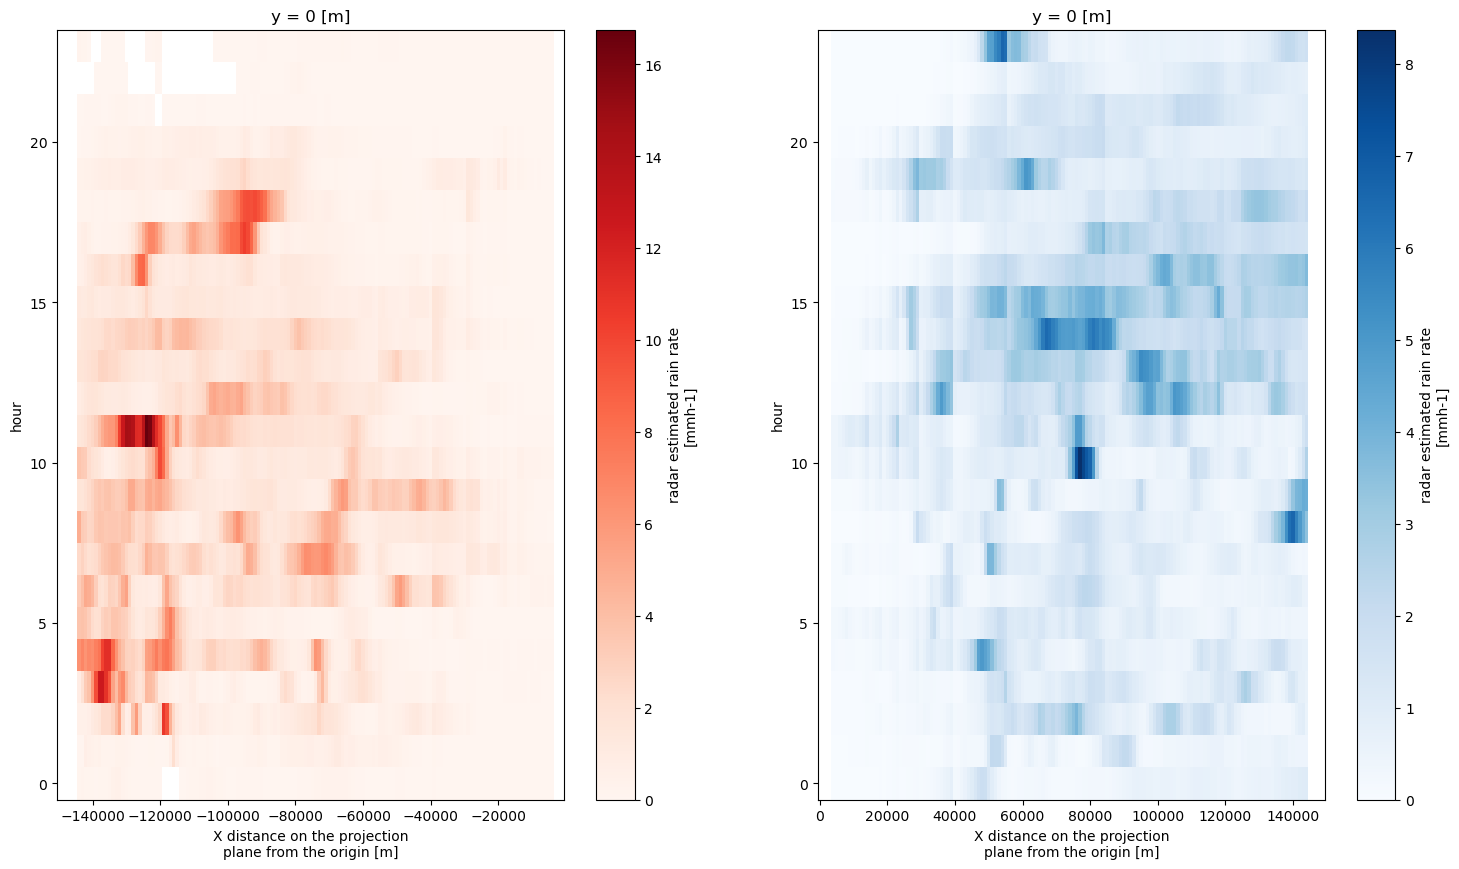

In [86]:
#ds_T.rainrate.sel(y=0).groupby("time.hour").mean().plot(cmap="Reds")
fig, ax = plt.subplots(1,2,figsize=(18,10))
ds_T.rainrate.isel(y=150,x=slice(0,150)).groupby("time.hour").mean().plot(ax=ax[0],cmap="Reds")
ds_T.rainrate.isel(y=150,x=slice(150,300)).groupby("time.hour").mean().plot(ax=ax[1],cmap="Blues")

#xr.plot.line(ds_T.rainrate.sel(y=0).groupby("time.hour").mean(),y=ds_T.time.groupby("time.hour"))

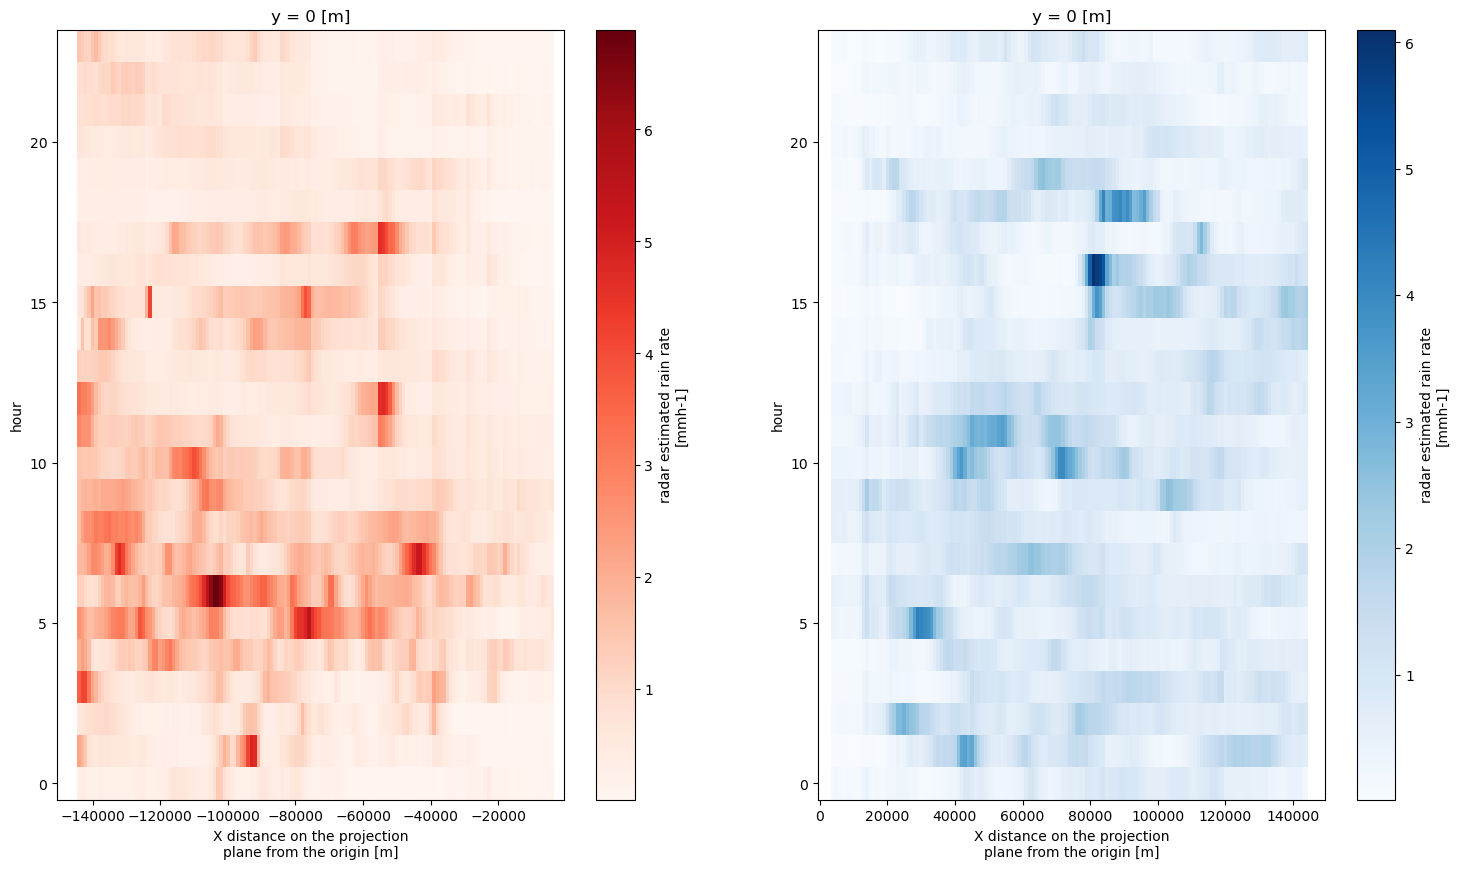

In [79]:
fig, ax = plt.subplots(1,2,figsize=(18,10))
ds_C.rainrate.isel(y=150,x=slice(0,150)).groupby("time.hour").mean().plot(ax=ax[0],cmap="Reds")
ds_C.rainrate.isel(y=150,x=slice(150,300)).groupby("time.hour").mean().plot(ax=ax[1],cmap="Blues")


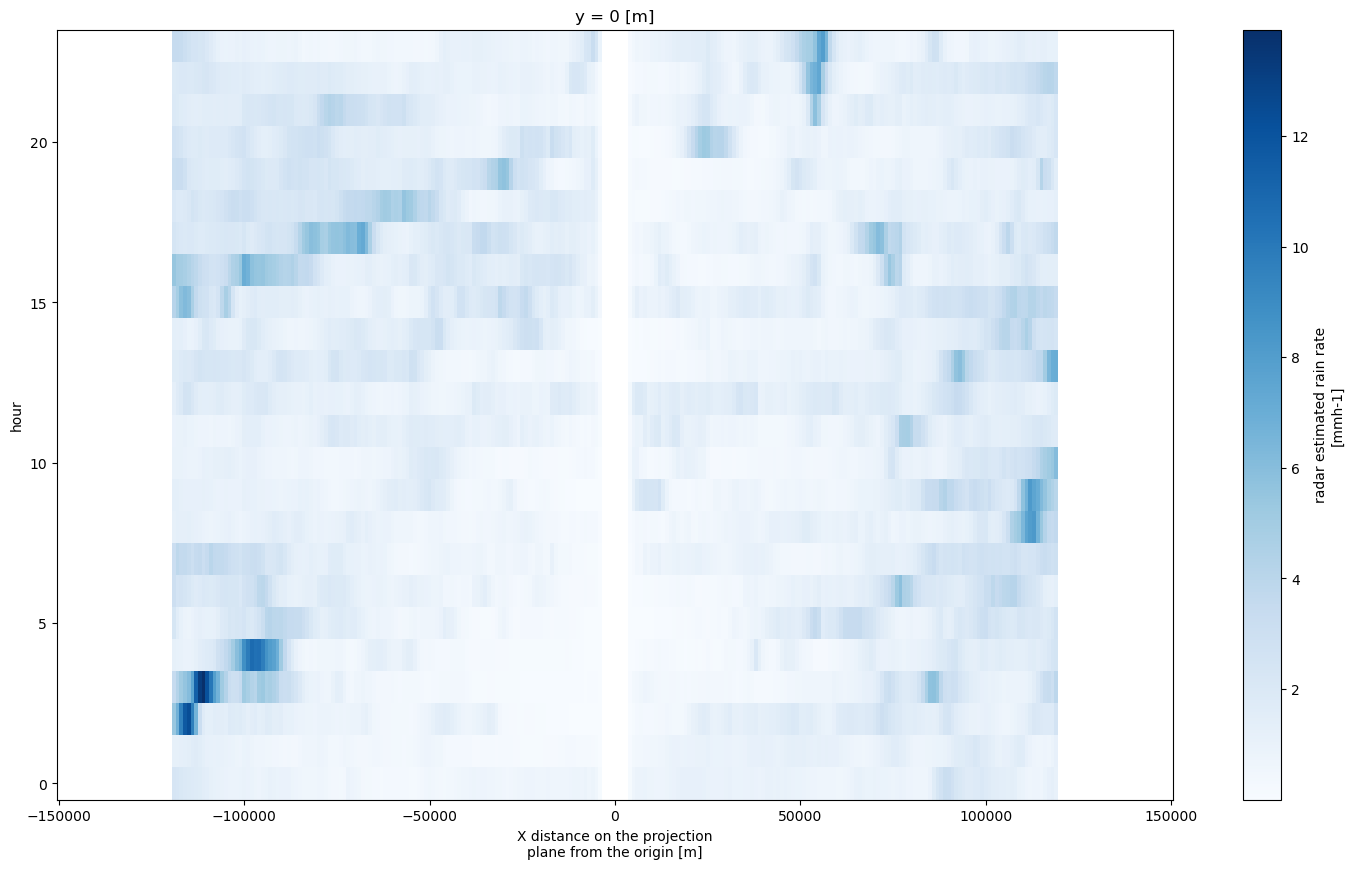

In [81]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
ds_W.rainrate.isel(y=150).groupby("time.hour").mean().plot(cmap="Blues")


## BARRA2 Average U Wind Component Data

In [4]:
# read in two month (Jan-Feb 2022) period BARRA2 data
mypath = "/g/data/v46/yvh565/barra2/yhuang/"
files = [os.path.join(root, f) for root, _, files in os.walk(mypath)
         for f in files
         if f.startswith('av_wnd_ucmp') and f.endswith('.nc')]
barra2_ds = xr.open_mfdataset(files, engine="netcdf4")

In [12]:
def plot_radar_barra2_hovmoller(start_time,end_time,barra2_variable,pressure,radar_variable,suptitle,barra_levels,
    radar_levels,barra_cmap,radar_cmap,barra_cbar_label,radar_cbar_label,n,anomaly=None,temp=None,contour_line_labels=None):
    
    start = start_time
    end = end_time
    
    # BARRA-2 ############
    time_slice_barra = slice(start, end)
    lat_C = -16.830002 # -16.817
    lat_W = -16.279999 # -16.2874
    lon_slice_T = slice(144, 149)                  
    lon_slice_C = slice(143,148)
    lon_slice_W = slice(148,152)
    
    if anomaly==True:
        variable_data_T_barra = barra2_ds[barra2_variable].isel(latitude=362).sel(longitude=lon_slice_T,time=time_slice_barra,pressure=pressure,
                        ).groupby("time.day") - barra2_ds[barra2_variable].isel(latitude=362).sel(longitude=lon_slice_T,
                        time=time_slice_barra,pressure=pressure).groupby("time.day").mean()

        variable_data_C_barra = barra2_ds[barra2_variable].isel(latitude=386).sel(longitude=lon_slice_C,time=time_slice_barra,pressure=pressure,
                        ).groupby("time.day") - barra2_ds[barra2_variable].isel(latitude=386).sel(longitude=lon_slice_C,
                        time=time_slice_barra,pressure=pressure).groupby("time.day").mean()

        variable_data_W_barra = barra2_ds[barra2_variable].isel(latitude=390).sel(longitude=lon_slice_W,time=time_slice_barra,pressure=pressure,
                        ).groupby("time.day") - barra2_ds[barra2_variable].isel(latitude=390).sel(longitude=lon_slice_W,
                        time=time_slice_barra,pressure=pressure).groupby("time.day").mean()
        
    else:
        if temp==True:
            variable_data_T_barra = barra2_ds[barra2_variable].isel(latitude=362).sel(longitude=lon_slice_T,time=time_slice_barra) - 273.15
            variable_data_C_barra = barra2_ds[barra2_variable].isel(latitude=386).sel(longitude=lon_slice_C,time=time_slice_barra) - 273.15
            variable_data_W_barra = barra2_ds[barra2_variable].isel(latitude=390).sel(longitude=lon_slice_W,time=time_slice_barra) - 273.15
        else:
            variable_data_T_barra = barra2_ds[barra2_variable].isel(latitude=362).sel(longitude=lon_slice_T,time=time_slice_barra,pressure=pressure) 
            variable_data_C_barra = barra2_ds[barra2_variable].isel(latitude=386).sel(longitude=lon_slice_C,time=time_slice_barra,pressure=pressure) 
            variable_data_W_barra = barra2_ds[barra2_variable].isel(latitude=390).sel(longitude=lon_slice_W,time=time_slice_barra,pressure=pressure) 

    # Get times and make array of datetime objects
    variable_times_T_barra = variable_data_T_barra.time.values.astype('datetime64[ns]').astype('O')
    variable_times_C_barra = variable_data_C_barra.time.values.astype('datetime64[ns]').astype('O')
    variable_times_W_barra = variable_data_W_barra.time.values.astype('datetime64[ns]').astype('O')
    # Change time from UTC to local time 
#    zone = ""
    # dtUTC = datetime.fromisoformat(st.replace('Z', '+00:00'))
#    dtUTC = datetime.strptime(variable_times_T_barra, '%Y-%m-%d %H:%M:%S.%f%z')
    # dtZone = dtUTC.astimezone(ZoneInfo(zone))
#    dtZone = dtUTC.astimezone(gettz(zone))

    # Specify longitude values for chosen domain
    lons_T_barra = variable_data_T_barra.longitude.values
    lons_C_barra = variable_data_C_barra.longitude.values
    lons_W_barra = variable_data_W_barra.longitude.values 

    # Radar #############
    time_slice_radar = slice(start, end)
    variable_data_T_radar = ds_T[radar_variable].isel(y=150).sel(time=time_slice_radar)
    variable_data_C_radar = ds_C[radar_variable].isel(y=150).sel(time=time_slice_radar)
    variable_data_W_radar = ds_W[radar_variable].isel(y=150).sel(time=time_slice_radar)
    # Get times and make array of datetime objects
    variable_times_T_radar = variable_data_T_radar.time.values.astype('datetime64[ns]').astype('O')
    variable_times_C_radar = variable_data_C_radar.time.values.astype('datetime64[ns]').astype('O')
    variable_times_W_radar = variable_data_W_radar.time.values.astype('datetime64[ns]').astype('O')
    # Change time from UTC to local solar time
    
    # Specify longitude values for chosen domain
    lons_T_radar = ds_T["longitude"].isel(y=150,time=0).values #variable_data_T_radar.x.values
    lons_C_radar = ds_C["longitude"].isel(y=150,time=0).values
    lons_W_radar = ds_W["longitude"].isel(y=150,time=0).values

    # make plot ###########
    fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(18,10))#,gridspec_kw={'width_ratios': [4, 4,5]})
    fig.patch.set_facecolor('white')

    # Set some titles
    axes[0].set_title('Townsville', loc='left', fontsize=20,fontweight=0.9)
    axes[1].set_title('Cairns', loc='left', fontsize=20,fontweight=0.9)
    axes[2].set_title('Willis Island', loc='left', fontsize=20,fontweight=0.9)
    fig.figure.suptitle(suptitle,fontsize=30) #,x=0.2,y=0.98,
    axes[-1].axis('off')
    fig.subplots_adjust(right=0.85)

    # Plot of chosen variable averaged over latitude and slightly smoothed
    levels = barra_levels
    levels1 = radar_levels
    # Townsville: axis 0
    axes[0].contourf(lons_T_barra, variable_times_T_barra, variable_data_T_barra, levels=levels, cmap=barra_cmap)
    cf_T_radar = axes[0].contourf(lons_T_radar, variable_times_T_radar, variable_data_T_radar, levels=levels1, cmap=radar_cmap)
    # Cairns: axis 1
    axes[1].contourf(lons_C_barra, variable_times_C_barra, variable_data_C_barra, levels=levels, cmap=barra_cmap);
    axes[1].contourf(lons_C_radar, variable_times_C_radar, variable_data_C_radar, levels=levels1, cmap=radar_cmap, extend='both')
    # Willis Island: axis 2
    cf_W_barra = axes[2].contourf(lons_W_barra, variable_times_W_barra, variable_data_W_barra, levels=levels, cmap=barra_cmap);
    axes[2].contourf(lons_W_radar, variable_times_W_radar, variable_data_W_radar, levels=levels1, cmap=radar_cmap, extend='both')               
    # plot wind speed contour lines                    
    line_colors = ['black' for l in cf_W_barra.levels]
    cs_T = axes[0].contour(lons_T_barra, variable_times_T_barra, variable_data_T_barra, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
    cs_C = axes[1].contour(lons_C_barra, variable_times_C_barra, variable_data_C_barra, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
    cs_W = axes[2].contour(lons_W_barra, variable_times_W_barra, variable_data_W_barra, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
    
    # plot contour line labels
    if contour_line_labels==True:
        plt.clabel(cs_T, fontsize=10, inline=1,fmt = '%1.0f')
        plt.clabel(cs_C, fontsize=10, inline=1,fmt = '%1.0f')
        plt.clabel(cs_W, fontsize=10, inline=1,fmt = '%1.0f')

    # plot cbar and cbar label 
    cbar_ax = fig.add_axes([0.855,0.06,0.025,0.84])
    cbar_ax1 = fig.add_axes([0.79, 0.06, 0.025, 0.84])
    cbar_W_barra = fig.colorbar(cf_W_barra, cax=cbar_ax,pad=0.04, aspect=30)
    cbar_W_radar = fig.colorbar(cf_T_radar, cax=cbar_ax1,pad=0.04, aspect=30)
    #cbar_W_barra = plt.colorbar(cf_W_barra, ax=axes[3],orientation='vertical', pad=0.04, aspect=30)
    cbar_W_barra.set_label(barra_cbar_label,fontsize=15)    
    #cbar_W_radar = plt.colorbar(cf_T_radar, ax=axes[3],orientation='vertical', pad=0, aspect=30)
    cbar_W_radar.set_label(radar_cbar_label,fontsize=15)
   
    # plot vertical lines to represent coastlines
    axes[0].axvline(147.5,color='blue',alpha=0.2,linestyle='--')
    axes[1].axvline(145.75,color='blue',alpha=0.2,linestyle='--')
    
    # plot locations of radars
    axes[0].axvline(146.5509,color='k',alpha=0.5,linestyle='-.')
    axes[1].axvline(145.683,color='k',alpha=0.5,linestyle='-.')
    axes[2].axvline(149.9646,color='k',alpha=0.5,linestyle='-.')
    
    # Make some ticks and tick labels
    xticks_T = np.arange(144,149,1)
    xticks_C = np.arange(143,148,1)
    xticks_W = np.arange(148,153,1)            
    axes[0].set_xticks(xticks_T)
    axes[1].set_xticks(xticks_C)
    axes[2].set_xticks(xticks_W)
                    
    x_tick_labels_T = ["144","145","146","147","148"]
    x_tick_labels_C = ["143","144","145","146","147"]
    x_tick_labels_W = ["148","149","150","151","152"]        
    axes[0].set_xticklabels(x_tick_labels_T)
    axes[1].set_xticklabels(x_tick_labels_C)
    axes[2].set_xticklabels(x_tick_labels_W)
    
    axes[0].set_yticks(variable_times_T_radar)
    axes[1].set_yticks([])
    axes[2].set_yticks([])
    axes[0].locator_params(axis='y', nbins=n)
    # datetime64[ns] = nano-second precision
    # datetime64[s] = second precision; datetime64[D] = date precision
    axes[0].set_yticklabels(variable_data_T_radar.time.values.astype('datetime64[s]'))
    axes[1].set(yticklabels=[]) 
    axes[2].set(yticklabels=[]) 
                    
    axes[0].set_xlabel("Longitude",fontsize=15)
    axes[1].set_xlabel("Longitude",fontsize=15)
    axes[2].set_xlabel("Longitude",fontsize=15)
    axes[0].set_ylabel("Time (UTC)",fontsize=20)            
                    
    fig.tight_layout()
    plt.show()
    return

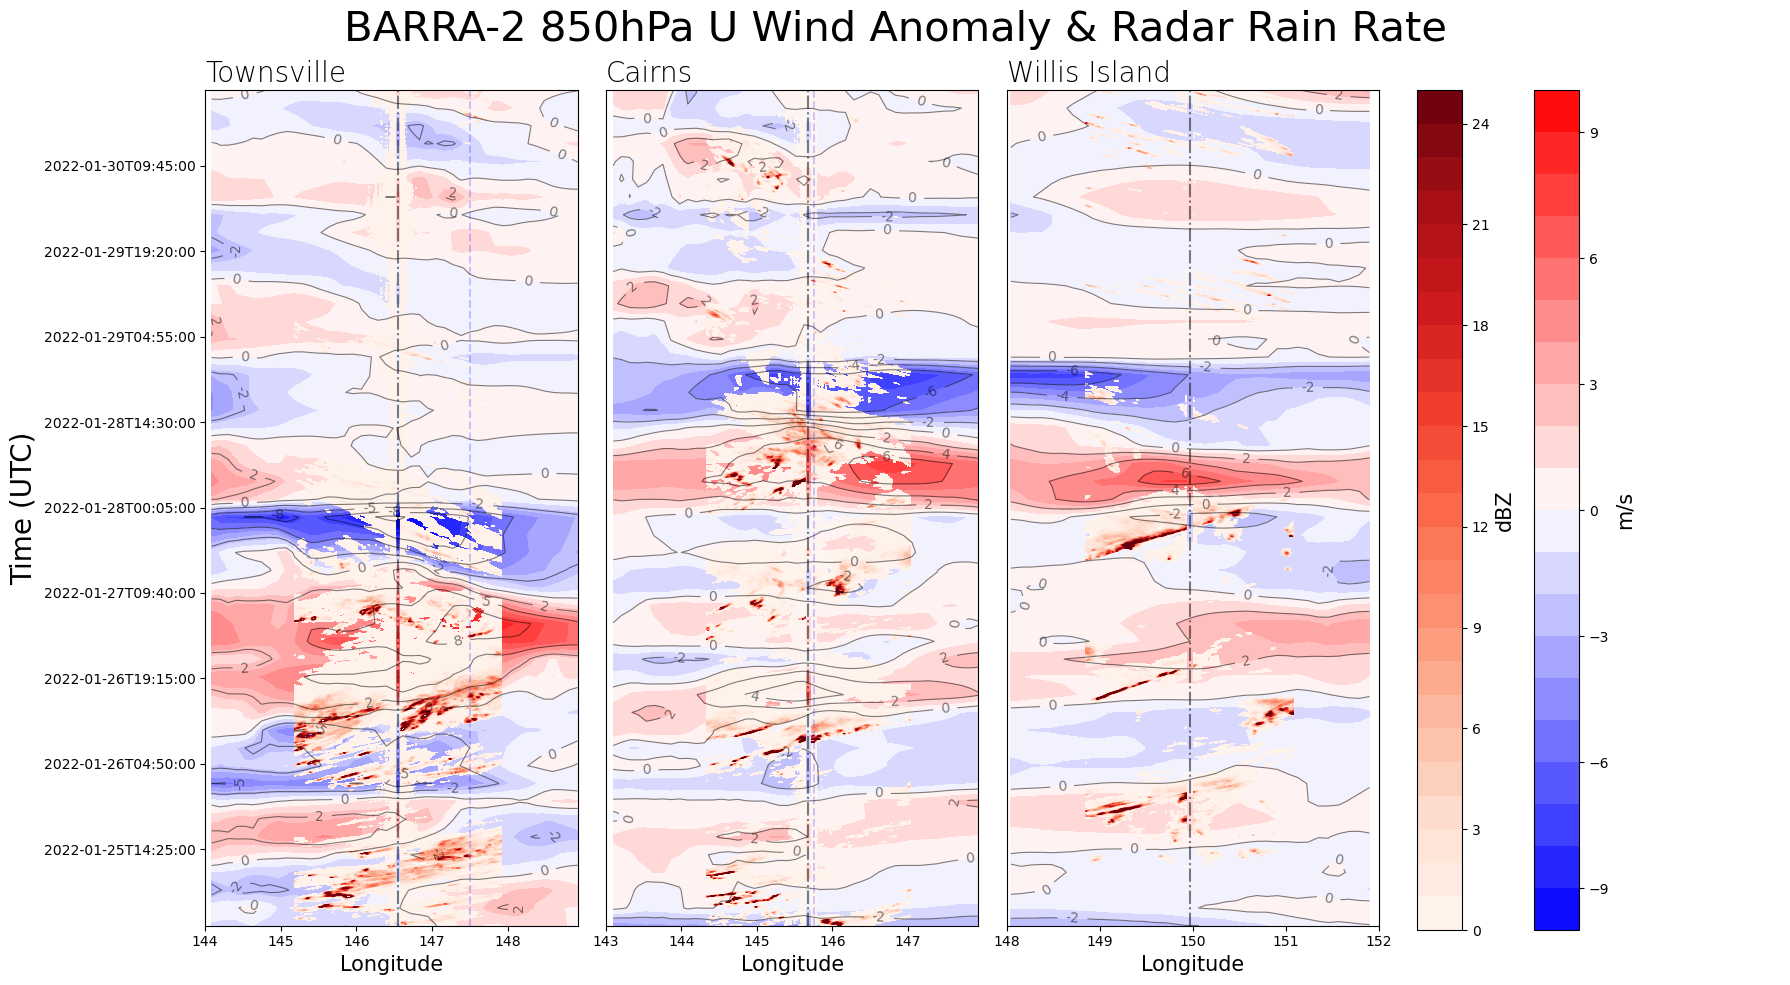

In [77]:
plot_radar_barra2_hovmoller("2022-01-25T00:00:00.000000000",'2022-01-30T23:55:00.000000000',
    "av_wnd_ucmp_uv",850,"rainrate","BARRA-2 850hPa U Wind Anomaly & Radar Rain Rate",
    [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10],
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
    "bwr","Reds","m/s","dBZ",10,anomaly=True,temp=False,contour_line_labels=True)